In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shutil


def main(df, name_mapping, plot_dir, error_bar_meaning):
    
    df_stats_all_range = df.groupby(['dataset_name', 'user_input_size']).agg({
        'new_global_accuracy': ['mean', 'min', 'max', 'std']
    }).reset_index()


    df_stats_all_range.columns = ['dataset_name', 'user_input_size', 'mean_accuracy', 'min_accuracy', 'max_accuracy','std_accuracy']
    
#     # Create a directory to save the plots
#     output_dir = '/mnt/data/dataset_plots'
    os.makedirs(plot_dir, exist_ok=True)

    # Loop through each dataset and generate the plots
    for idx, dataset_name in enumerate(list(name_mapping)):
        dataset_data = df_stats_all_range[df_stats_all_range['dataset_name'] == dataset_name]

        # Set up the plot for the current dataset
        plt.figure(figsize=(3, 4))

        # Create the bar plot
        bar_plot = sns.barplot(
            x='user_input_size',
            y='mean_accuracy',
            data=dataset_data,
            palette='Set2',
            ci=None,
            capsize=0.2,
            errwidth=1,        
            width=0.9  # Narrower bars
        )

        # Add manual error bars for each user_input_size (min to max range)
        for bar, row in zip(bar_plot.patches, dataset_data.itertuples()):
            bar_position = bar.get_x() + bar.get_width() / 2
            error_lower = row.mean_accuracy - row.min_accuracy
            error_upper = row.max_accuracy - row.mean_accuracy
            if(error_bar_meaning=='min_max'):
                plt.errorbar(
                    x=bar_position,
                    y=row.mean_accuracy,
                    yerr=[[error_lower], [error_upper]],  # Define error bars as (min to max)
                    fmt='none',
                    ecolor='black',
                    capsize=5,
                    elinewidth=2.5
                )
            elif(error_bar_meaning=='std'):
                plt.errorbar(
                x=bar_position,
                y=row.mean_accuracy,
                yerr=row.std_accuracy,  # Standard deviation as the error
                fmt='none',
                ecolor='black',
                capsize=5,
                elinewidth=2.5
            )
            else:
                print("not a valid error bar option")
                break
            
#         if idx % 4 == 0:
#             plt.ylabel('Global Acc.', fontsize=16)
#         else:
#             plt.gca().set_yticklabels([])


        # Add the reference line for before_fix_global_accuracy
        before_fix_value = df[df['dataset_name'] == dataset_name]['before_fix_global_accuracy'].iloc[0]
        plt.axhline(y=before_fix_value, linestyle='--', color='red', label='Original Global Acc.', linewidth=3)

        # Labeling the plot
        plt.title(f'{name_mapping[dataset_name]}', fontsize=14)
        plt.xlabel('Training Set Size', fontsize=15)
        plt.ylabel('Global Acc.', fontsize=15)
        plt.legend(loc='lower center', fontsize=12)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.tight_layout(pad=1) 
#         # Save the plot as a PNG file
        plt.savefig(f'{plot_dir}/global_accuracy_plot_{dataset_name}_error_bar_{error_bar_meaning}.png')
        plt.show()
        plt.close()
        
        
    shutil.make_archive(plot_dir, 'zip', plot_dir)


#     # Zip the directory



In [2]:
df = pd.read_csv('../df_solver_final_version.csv')

In [3]:
df['dataset_name'].unique()

array(['agnews', 'amazon', 'fakenews', 'imdb', 'painter_architect',
       'physician_professor', 'plots', 'professor_teacher', 'spam',
       'tweets', 'yelp'], dtype=object)

In [4]:
dataset_naming_mappings = {
'amazon': 'Amazon',
'agnews': 'AGNews' ,
'physician_professor': 'PP' ,
'imdb': 'IMDB' ,
'fakenews': 'FNews' ,
'yelp': 'Yelp',
'professor_teacher': 'PT',
'painter_architect': 'PA',
'tweets': 'Tweets',
'spam': 'SMS',
'plots': 'MGenre',
}

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


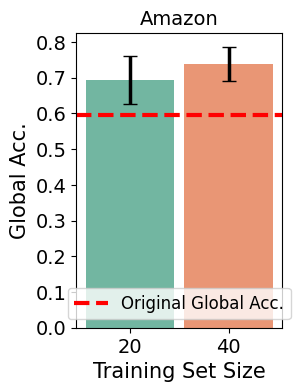

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


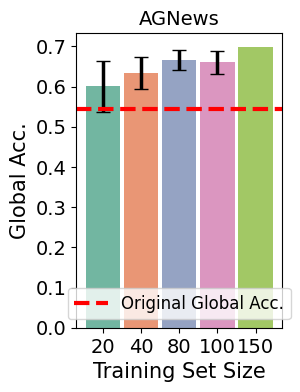

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


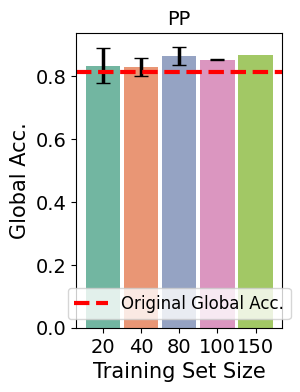

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


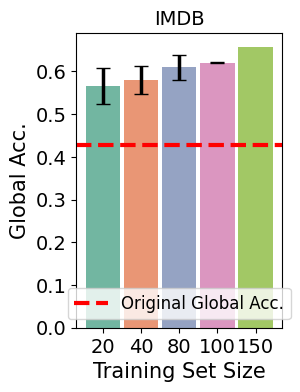

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


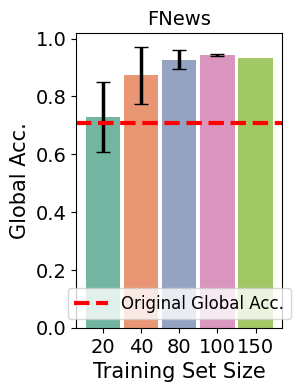

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


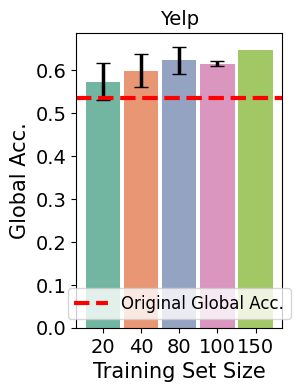

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


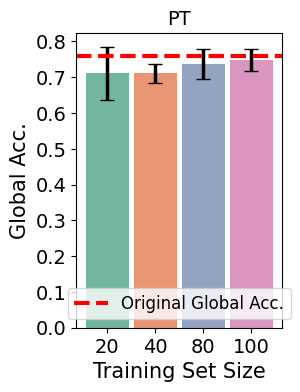

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


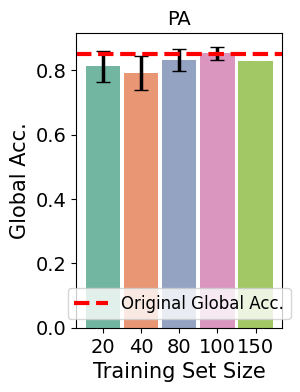

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


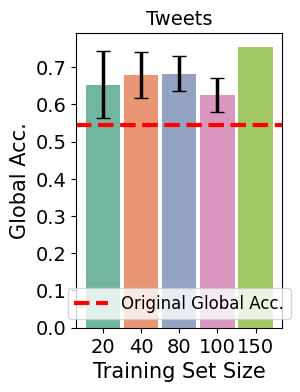

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


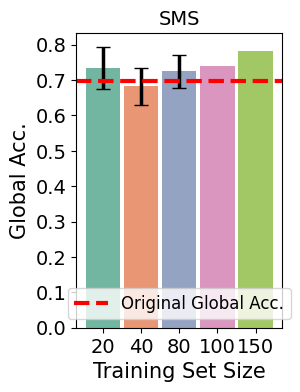

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/opc/.pyenv/versions/3.8.0/envs/label/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


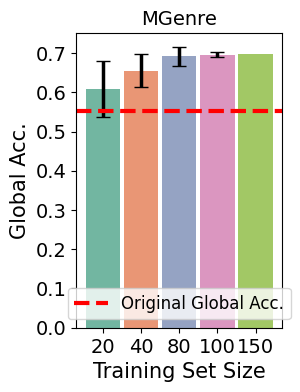

In [5]:
main(df=df, name_mapping=dataset_naming_mappings, plot_dir='./global_accs_plots_std', error_bar_meaning='std')

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


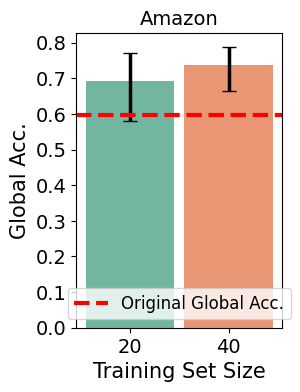

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


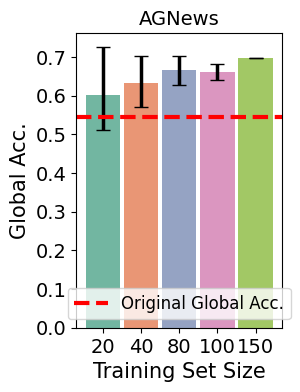

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


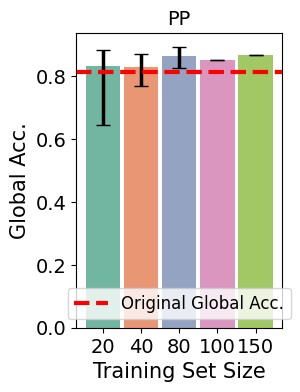

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


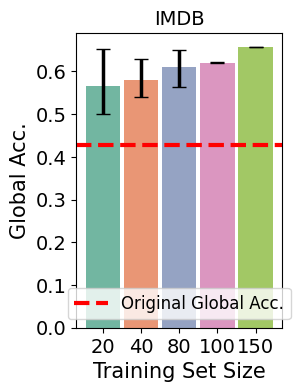

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


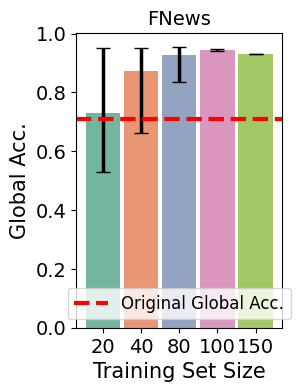

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


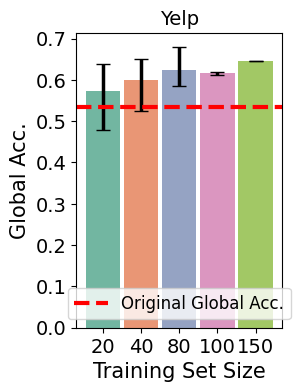

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


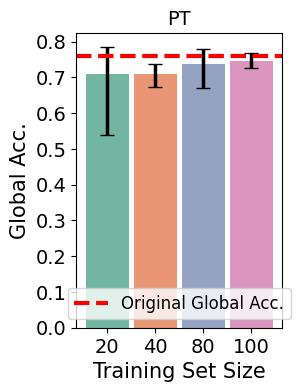

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


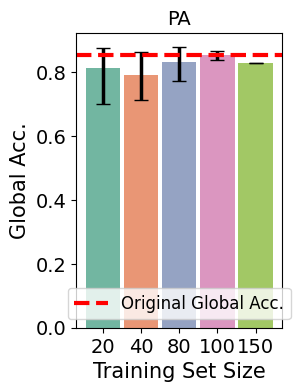

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


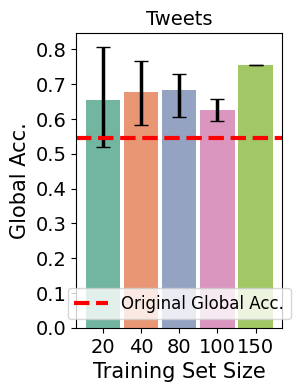

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


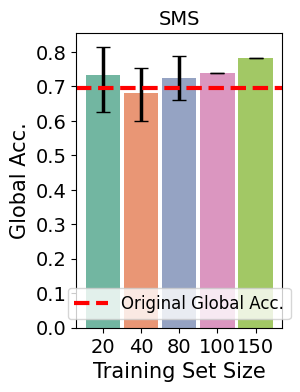

/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_12650/1935906212.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(


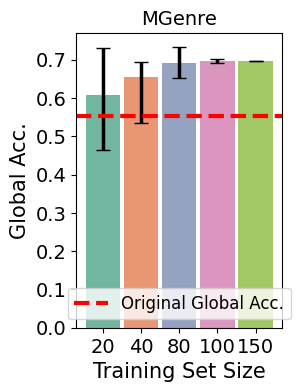

In [6]:
main(df=df, name_mapping=dataset_naming_mappings, plot_dir='./global_accs_plots_minmax', error_bar_meaning='min_max')